# Decision Trees and Random Forests in Python

In [193]:
import pandas as pd #for data munging
import numpy as np # for mathematicla operations
from collections import Counter # like table function in R
import matplotlib.pyplot as plt # for visualization
import seaborn as sns# for visualization
%matplotlib inline

In [194]:
#read the train data
train=pd.read_csv("C:\\Users\\singh\\Desktop\\Imarticus Projects\\Intrusion Detection Using Ensemble Learning Decision Tree\\Network_Intrusion_Train_data.csv")
#read the test data
test=pd.read_csv("C:\\Users\\singh\\Desktop\\Imarticus Projects\\Intrusion Detection Using Ensemble Learning Decision Tree\\Network_Intrusion_Validate_data.csv")

In [195]:
#merge the 2 dataframes
all=pd.concat([train,test],axis=0)

In [196]:
all.shape

(47736, 42)

In [75]:
all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [76]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47736 entries, 0 to 22543
Data columns (total 42 columns):
duration                       47736 non-null int64
protocol_type                  47736 non-null object
service                        47736 non-null object
flag                           47736 non-null object
src_bytes                      47736 non-null int64
dst_bytes                      47736 non-null int64
land                           47736 non-null int64
wrong_fragment                 47736 non-null int64
urgent                         47736 non-null int64
hot                            47736 non-null int64
num_failed_logins              47736 non-null int64
logged_in                      47736 non-null int64
num_compromised                47736 non-null int64
root_shell                     47736 non-null int64
su_attempted                   47736 non-null int64
num_root                       47736 non-null int64
num_file_creations             47736 non-null int64
num_

In [77]:
all.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,47736.000000,4.773600e+04,4.773600e+04,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,...,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000
mean,264.347285,1.774954e+04,2.813757e+03,0.000189,0.016507,0.000356,0.154286,0.010851,0.417169,0.176869,...,187.886291,127.194319,0.561790,0.086317,0.140278,0.026080,0.197021,0.194640,0.172387,0.169733
std,2178.505660,1.781220e+06,6.616178e+04,0.013730,0.213064,0.025481,1.690612,0.108927,0.493097,9.068051,...,96.848516,111.921285,0.444949,0.203750,0.307468,0.099666,0.385606,0.388126,0.351446,0.363230
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.500000e+01,3.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,98.000000,0.760000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.840000e+02,5.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.040000,0.010000,0.020000,0.000000,0.020000,0.000000
max,57715.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
all.columns

Index([u'duration', u'protocol_type', u'service', u'flag', u'src_bytes',
       u'dst_bytes', u'land', u'wrong_fragment', u'urgent', u'hot',
       u'num_failed_logins', u'logged_in', u'num_compromised', u'root_shell',
       u'su_attempted', u'num_root', u'num_file_creations', u'num_shells',
       u'num_access_files', u'num_outbound_cmds', u'is_host_login',
       u'is_guest_login', u'count', u'srv_count', u'serror_rate',
       u'srv_serror_rate', u'rerror_rate', u'srv_rerror_rate',
       u'same_srv_rate', u'diff_srv_rate', u'srv_diff_host_rate',
       u'dst_host_count', u'dst_host_srv_count', u'dst_host_same_srv_rate',
       u'dst_host_diff_srv_rate', u'dst_host_same_src_port_rate',
       u'dst_host_srv_diff_host_rate', u'dst_host_serror_rate',
       u'dst_host_srv_serror_rate', u'dst_host_rerror_rate',
       u'dst_host_srv_rerror_rate', u'class'],
      dtype='object')

In [ ]:
#identify the categorical & the continuous variables

In [79]:
all.select_dtypes(include=['object']).head()# to see all categorical columns
#df.select_dtypes(include=[np.number]) # to see all numerical/ continuous columns

,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,anomaly
3,tcp,http,SF,normal
4,tcp,http,SF,normal


In [ ]:
# lets study barplots of each categorical columns

In [81]:
print all['class'].value_counts()
print("\n") # print a eppty line
print Counter(all['class'])

anomaly    24576
normal     23160
Name: class, dtype: int64


Counter({'anomaly': 24576, 'normal': 23160})


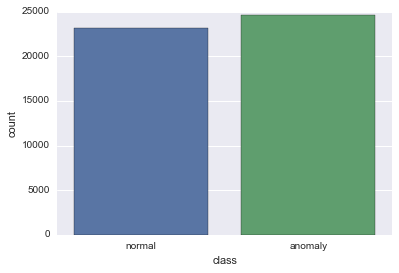

In [82]:
sns.countplot(all['class'])

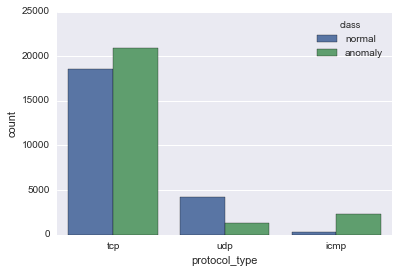

In [83]:
sns.countplot("protocol_type",hue="class",data=all)
# what odes this tell us?
# is Protocol type important?
#yes esp udp and icmp as most of them are normal & anamaly repectively

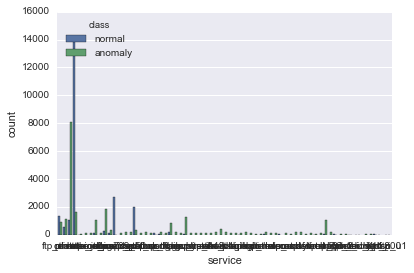

In [84]:
sns.countplot("service",hue="class",data=all)

In [85]:
all['service'].value_counts()

http           15856
private         9125
domain_u        2714
smtp            2383
ftp_data        2247
telnet          2109
other           1696
ecr_i           1365
eco_i           1171
pop_3           1072
ftp             1037
finger           502
imap4            444
auth             256
sunrpc           226
Z39_50           217
uucp             207
courier          204
bgp              192
time             191
whois            185
iso_tsap         179
uucp_path        179
ctf              168
nnsp             165
domain           160
vmnet            150
http_443         149
urp_i            147
csnet_ns         145
               ...  
mtp              122
systat           120
hostnames        119
exec             118
klogin           113
netbios_ns       112
netbios_dgm      110
ldap             109
login            108
netstat          104
echo             102
kshell            91
ssh               84
nntp              82
netbios_ssn       82
sql_net           64
IRC          

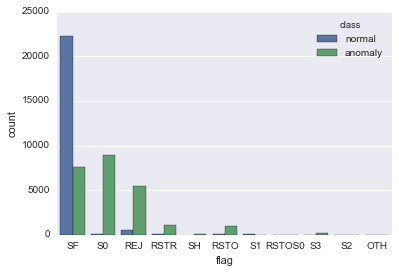

In [86]:
sns.countplot("flag",hue="class",data=all)

In [87]:
all['flag'].value_counts()

SF        29848
S0         9022
REJ        6066
RSTR       1166
RSTO       1077
S3          264
SH          116
S1          109
S2           36
RSTOS0       23
OTH           9
Name: flag, dtype: int64

In [ ]:
# let us run a normal decision tree using all variables

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree = DecisionTreeClassifier()

In [88]:
# convert the categorical variables to dummy variables
dum1=pd.get_dummies(all['flag'],drop_first=True)
dum2=pd.get_dummies(all['service'],drop_first=True)
dum3=pd.get_dummies(all['protocol_type'],drop_first=True)
#add all the dummy variable to the original data frame
df_new=pd.concat([all,dum1,dum2,dum3],axis=1)

In [90]:
#split data back into the same train and test

In [97]:
train_new=df_new.head(len(train))#split back into original train and test
test_new=df_new.tail(len(test))

In [108]:
X_train=train_new.drop(['class','service','flag','protocol_type'],axis=1)
y_train=train_new['class']
X_test=test_new.drop(['class','service','flag','protocol_type'],axis=1)
y_test=test_new['class']

In [109]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Prediction and Evaluation

In [110]:
predictions = dtree.predict(X_test)

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    anomaly       0.97      0.70      0.81     12833
     normal       0.71      0.97      0.82      9711

avg / total       0.86      0.82      0.82     22544



In [113]:
print(confusion_matrix(y_test,predictions))

[[9017 3816]
 [ 290 9421]]


# Tree Visualization¶

In [124]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [118]:
features = list(train.columns[0:-1])
#features--> all but the dependent variable

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [156]:
#tree visualiztion did not work as i dont have the software graphviz
#dot_data = StringIO()  
#export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png()) 

In [132]:
from sklearn import tree
tree.export_graphviz(dtree,out_file='tree.dot')   

# Random Forests

In [150]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,max_features=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [151]:
rfc_pred = rfc.predict(X_test)

In [152]:
print(confusion_matrix(y_test,rfc_pred))

[[8183 4650]
 [ 257 9454]]


In [153]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    anomaly       0.97      0.64      0.77     12833
     normal       0.67      0.97      0.79      9711

avg / total       0.84      0.78      0.78     22544



In [165]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

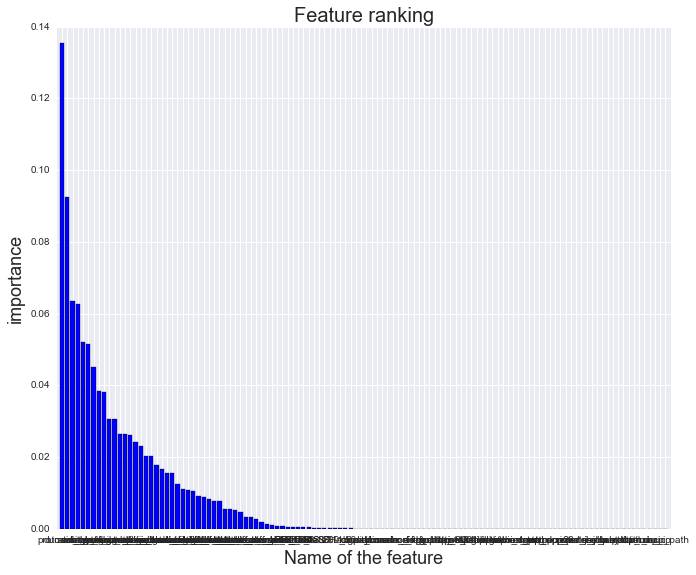

In [177]:
feature_names = train_new.columns # e.g. ['A', 'B', 'C', 'D', 'E']

f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X_train.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X_train.shape[1]), feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("Name of the feature", fontsize = 18)

In [178]:
# let us try to use only important features instead of using everything

In [183]:
train.columns

Index([u'duration', u'protocol_type', u'service', u'flag', u'src_bytes',
       u'dst_bytes', u'land', u'wrong_fragment', u'urgent', u'hot',
       u'num_failed_logins', u'logged_in', u'num_compromised', u'root_shell',
       u'su_attempted', u'num_root', u'num_file_creations', u'num_shells',
       u'num_access_files', u'num_outbound_cmds', u'is_host_login',
       u'is_guest_login', u'count', u'srv_count', u'serror_rate',
       u'srv_serror_rate', u'rerror_rate', u'srv_rerror_rate',
       u'same_srv_rate', u'diff_srv_rate', u'srv_diff_host_rate',
       u'dst_host_count', u'dst_host_srv_count', u'dst_host_same_srv_rate',
       u'dst_host_diff_srv_rate', u'dst_host_same_src_port_rate',
       u'dst_host_srv_diff_host_rate', u'dst_host_serror_rate',
       u'dst_host_srv_serror_rate', u'dst_host_rerror_rate',
       u'dst_host_srv_rerror_rate', u'class'],
      dtype='object')

In [197]:
pd.crosstab(train['land'],train['class'], margins=False)#land is not important

class,anomaly,normal
land,,
0,11742,13448
1,1,1


In [191]:
pd.crosstab(train['duration']<50,train['class'], margins=False)
#duration not important

class,anomaly,normal
duration,,
False,248,505
True,11495,12944


In [192]:
pd.crosstab(train['src_bytes']<50,train['class'], margins=False)
#u'src_bytes' is important

class,anomaly,normal
src_bytes,,
False,1023,10587
True,10720,2862


In [ ]:
#homework, 
#do this for all remining variables
#identify the important variables
#and run a model with only the important variables